# Задание лабораторной работы

- Выбрать набор данных (датасет) для решения задачи классификации или регресии.
- В случае необходимости произвести удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделить выборку на обучающую и тестовую.
- Обучить следующие ансамблевые модели: одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья); одну из моделей группы бустинга; одну из моделей группы стекинга.
- Дополнительно к указанным моделям обучить еще две модели: модель многослойного персептрона; модель МГУА.
- Оценить качество моделей с помощью одной из подходящих для задачи метрик. Сравнить качество полученных моделей.

# Ячейки Jupyter-ноутбука

## Выбор и загрузка данных

В качестве датасета будем использовать набор данных, содержащий данные о различных стёклах. Данный набор доступен по адресу: https://www.kaggle.com/datasets/uciml/glass

Набор данных имеет следующие атрибуты:

- RI - Refractive Index - коэффициент преломления
- Na - Sodium - Содержание натрия (массовый процент в соответствующем оксиде)
- Mg - Magnesium - Содержание магния
- Al - Aluminum - Содержание алюминия
- Si - Silicon - Содержание кремния
- K -  Potassium - Содержание калия
- Ca - Calcium - Содержание кальция
- Ba - Barium - Содеражние бария
- Fe - Iron - Содержание железа
- Type - Type of glass - тип стекла (1, 2 - стекла для зданий, 3, 4 - стекла для автомобилей, 5 - стеклотара, 6 - бытовые стекла, 7 - стекла для ламп; 4 отсутствует в данном наборе данных)

### Импорт библиотек

Импортируем библиотеки с помощью команды import:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

Уберем предупреждения:

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

Загрузим набор данных:

In [3]:
data = pd.read_csv('glass.csv')

## Первичный анализ и обработка данных

Выведем первые 5 строк датасета:

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Определим размер датасета:

In [5]:
data.shape

(214, 10)

### Обработка данных

Проверим наличие пропусков:

In [6]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

В датасете не наблюдаются пропуски.

Определим типы данных:

In [7]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Кодирование категориальных признаков не потребуется.

### Разделение данных

Разделим данные на столбец с целевым признаком и данные с другими столбцами:

In [8]:
X = data.drop("Type", axis=1)
y = data["Type"]

In [9]:
print(X.head(), "\n")
print(y.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0 

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


In [10]:
print(X.shape)
print(y.shape)

(214, 9)
(214,)


### Разделение выборки на обучающую и тестовую

Будем решать задачу регрессии - отображения новых предсказанных записей.

Для этого разделим выборку с помощью функции train_test_split:

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

## Обучение ансамблевых моделей

### Модель бэггинга

In [14]:
from sklearn.ensemble import BaggingRegressor

Обучим модель на 5 деревьях:

In [15]:
bagging_model = BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)
bagging_model.fit(X_train, y_train)

BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)

Сконвертируем объекты, которые были использованы в обучающей выборке каждого дерева, в двоичную матрицу (1 соответствует элементам, попавшим в обучающую выборку):

In [16]:
bin_array = np.zeros((5, X_train.shape[0]))
for i in range(5):
    for j in bagging_model.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,

Визуализируем эти данные:

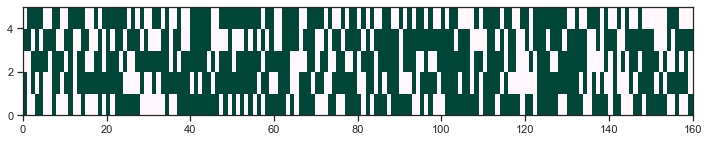

In [17]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='PuBuGn')
plt.show()

Оценим Out-of-bag error (теоретическое значение = 37%) - несмещенную оценку ошибки набора тестов:

In [18]:
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели 1 размер OOB составляет 38.12%
Для модели 2 размер OOB составляет 35.0%
Для модели 3 размер OOB составляет 34.38%
Для модели 4 размер OOB составляет 36.88%
Для модели 5 размер OOB составляет 42.5%


Визуализируем обученные деревья:

In [19]:
from io import StringIO 
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

In [20]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

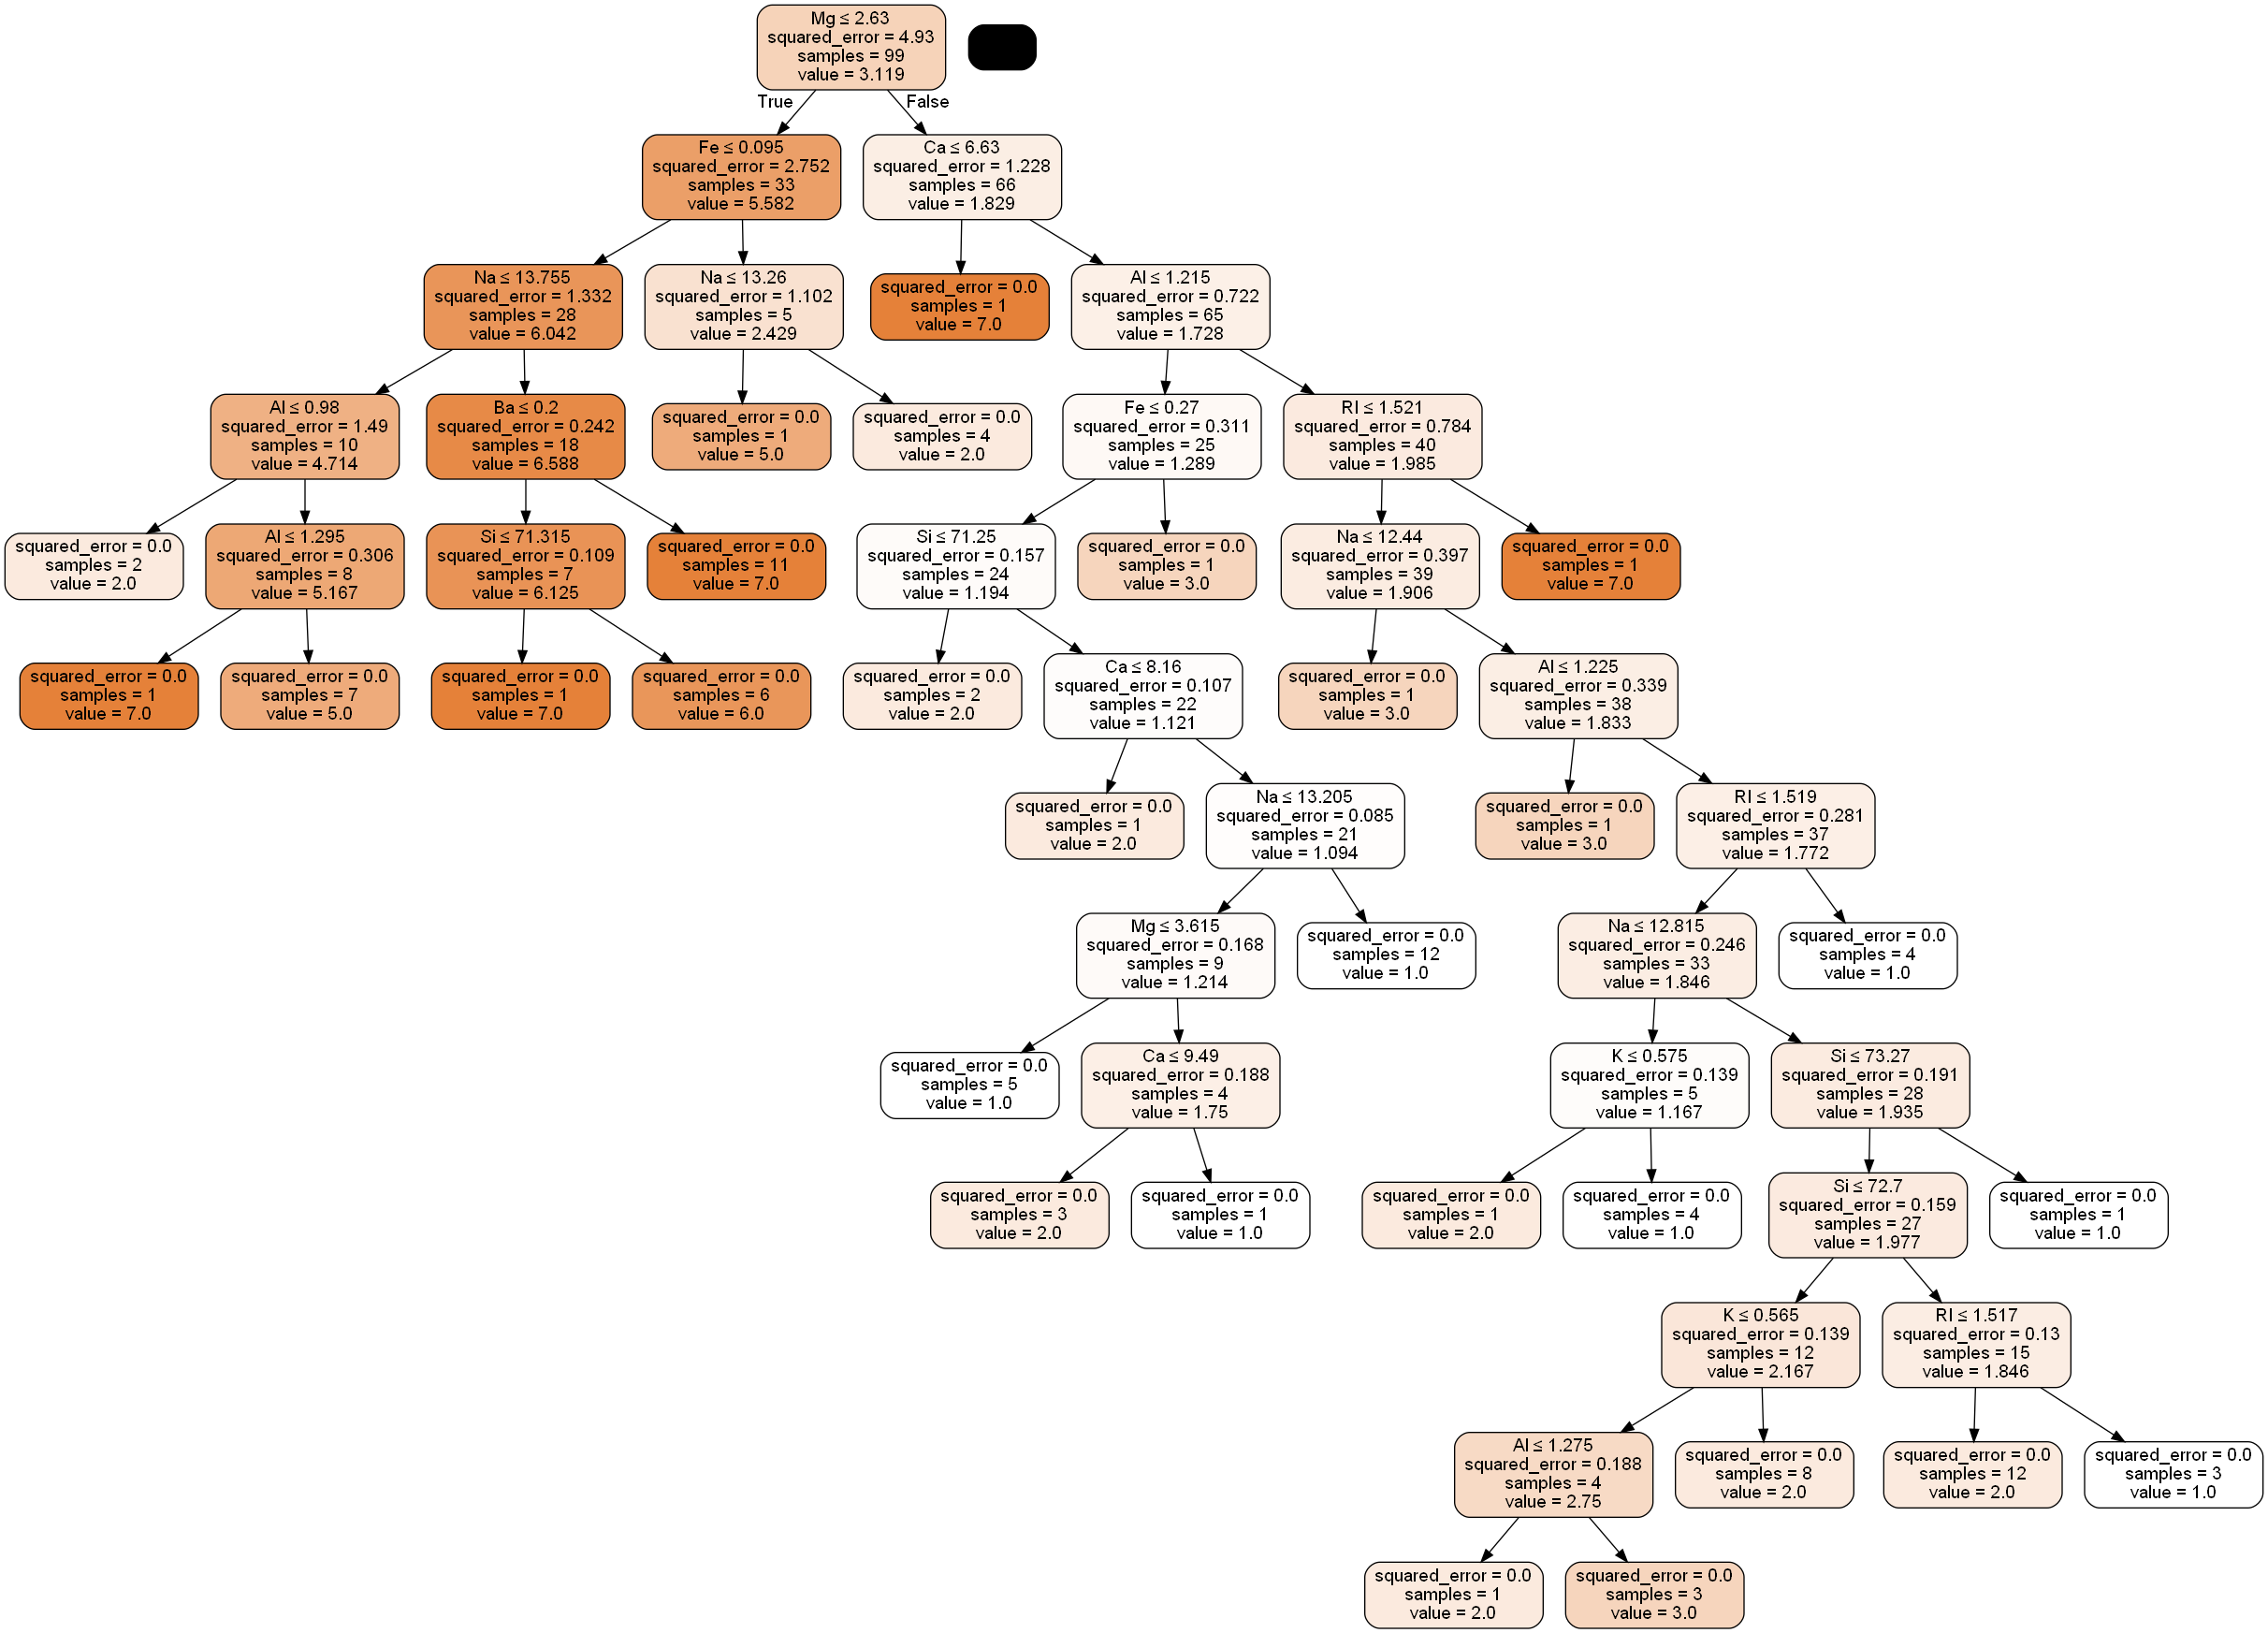

In [21]:
Image(get_png_tree(bagging_model.estimators_[0], X.columns))

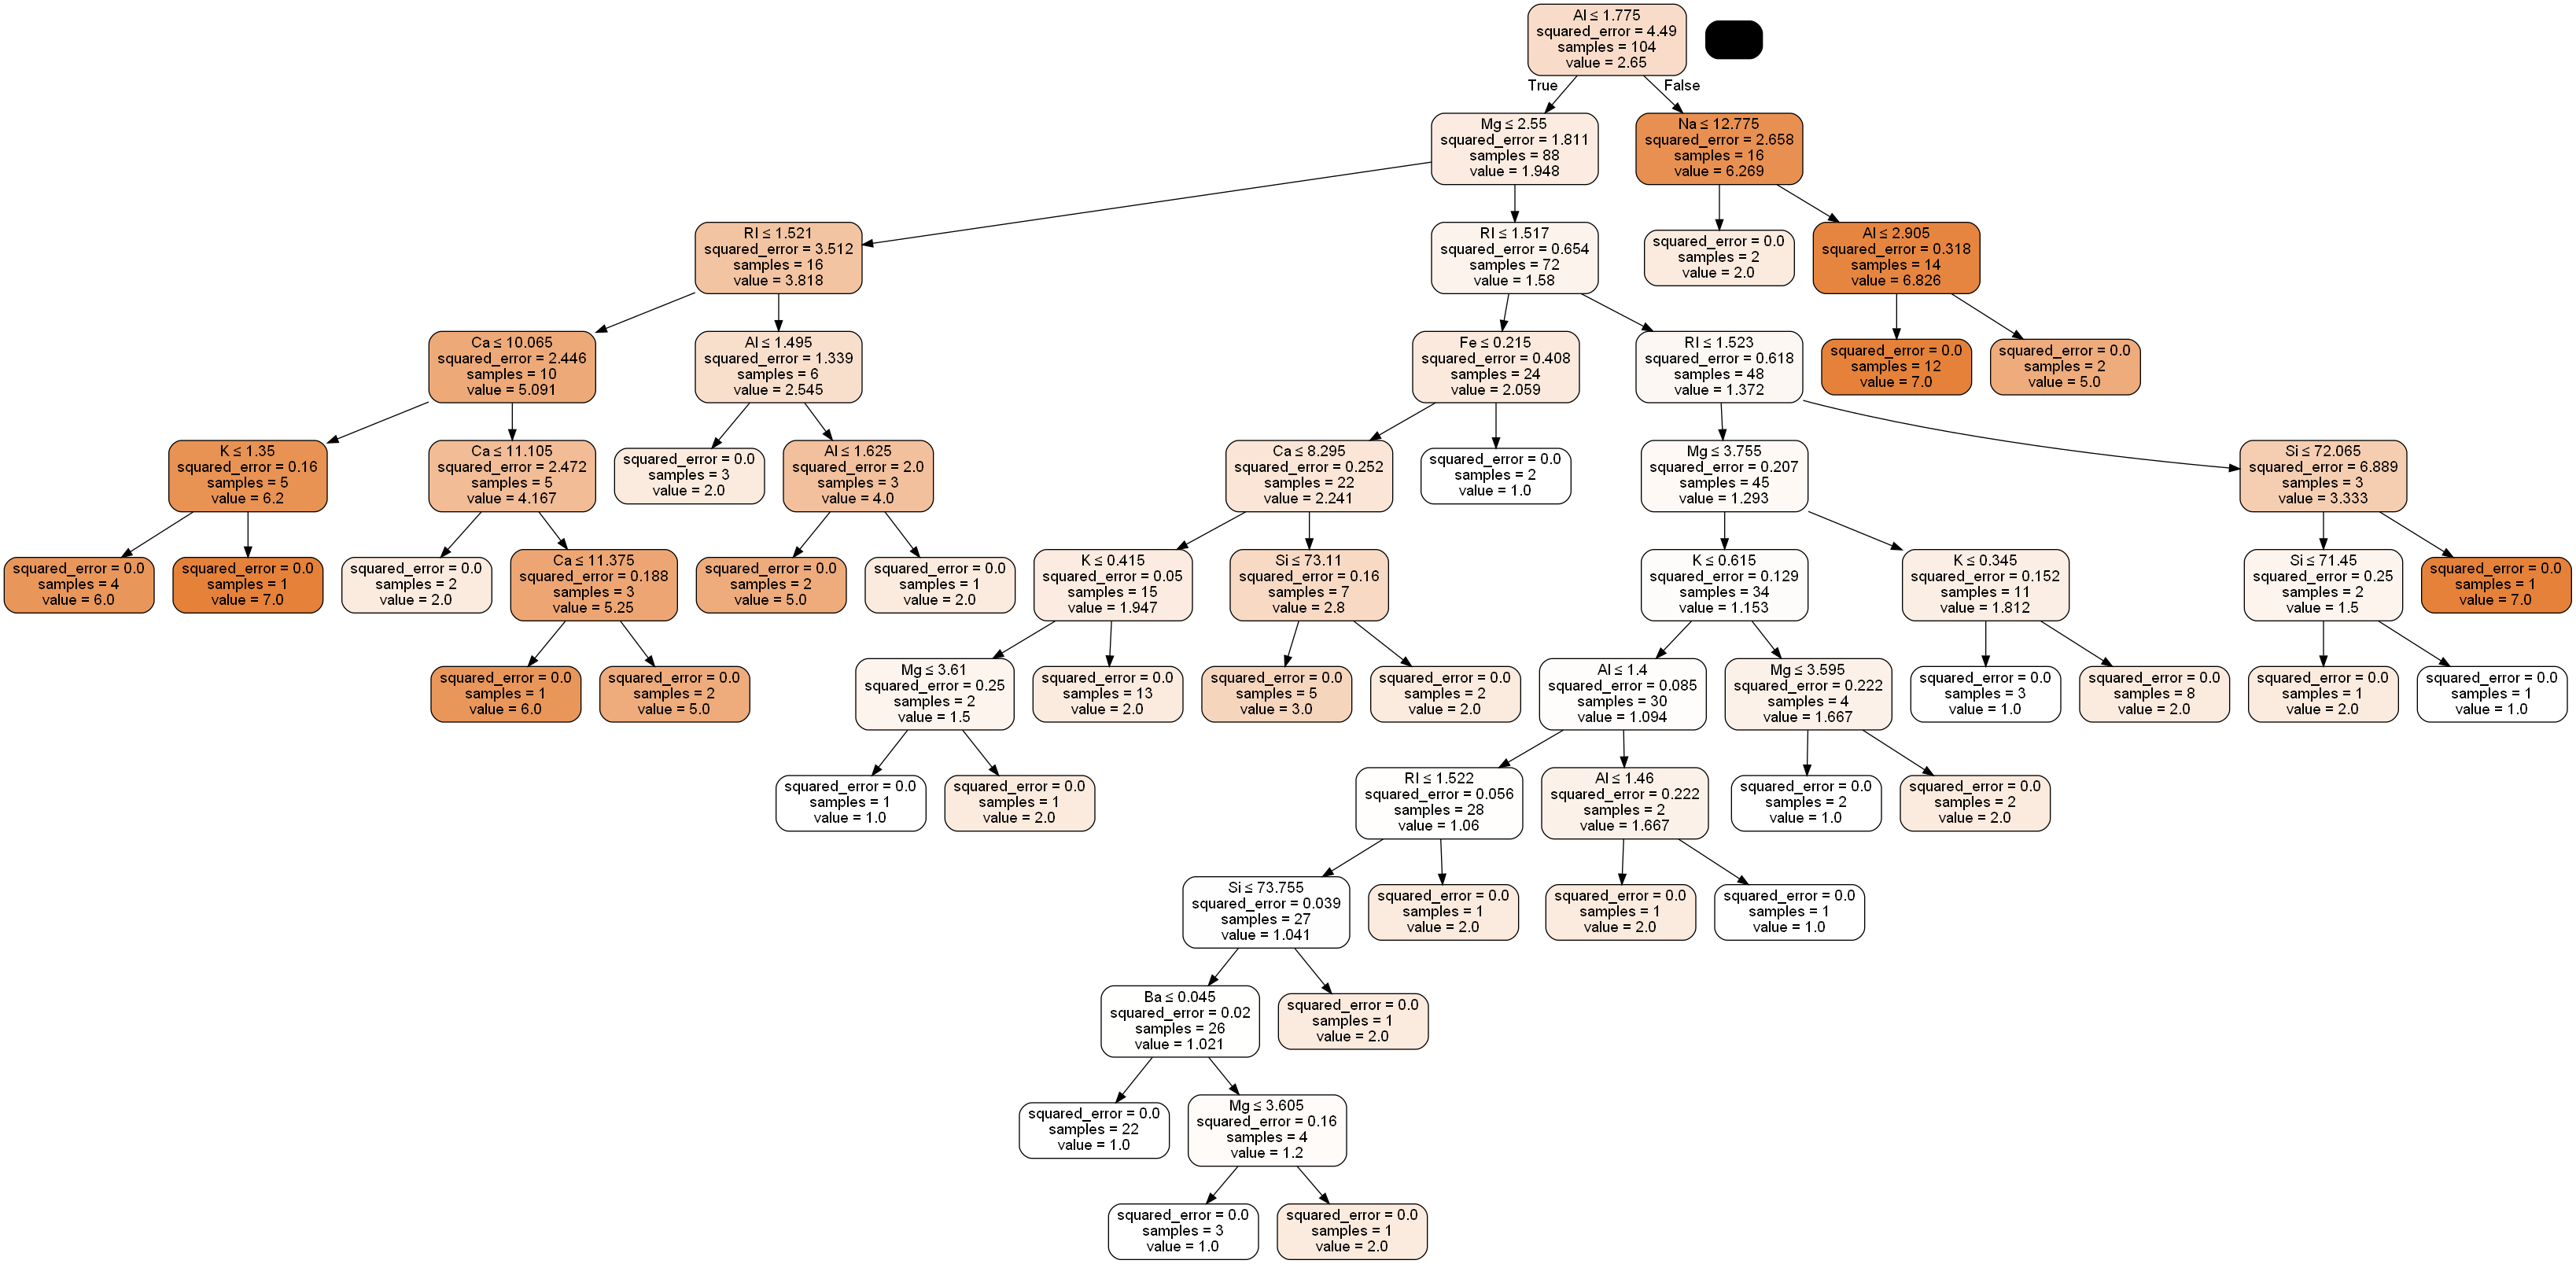

In [22]:
Image(get_png_tree(bagging_model.estimators_[1], X.columns))

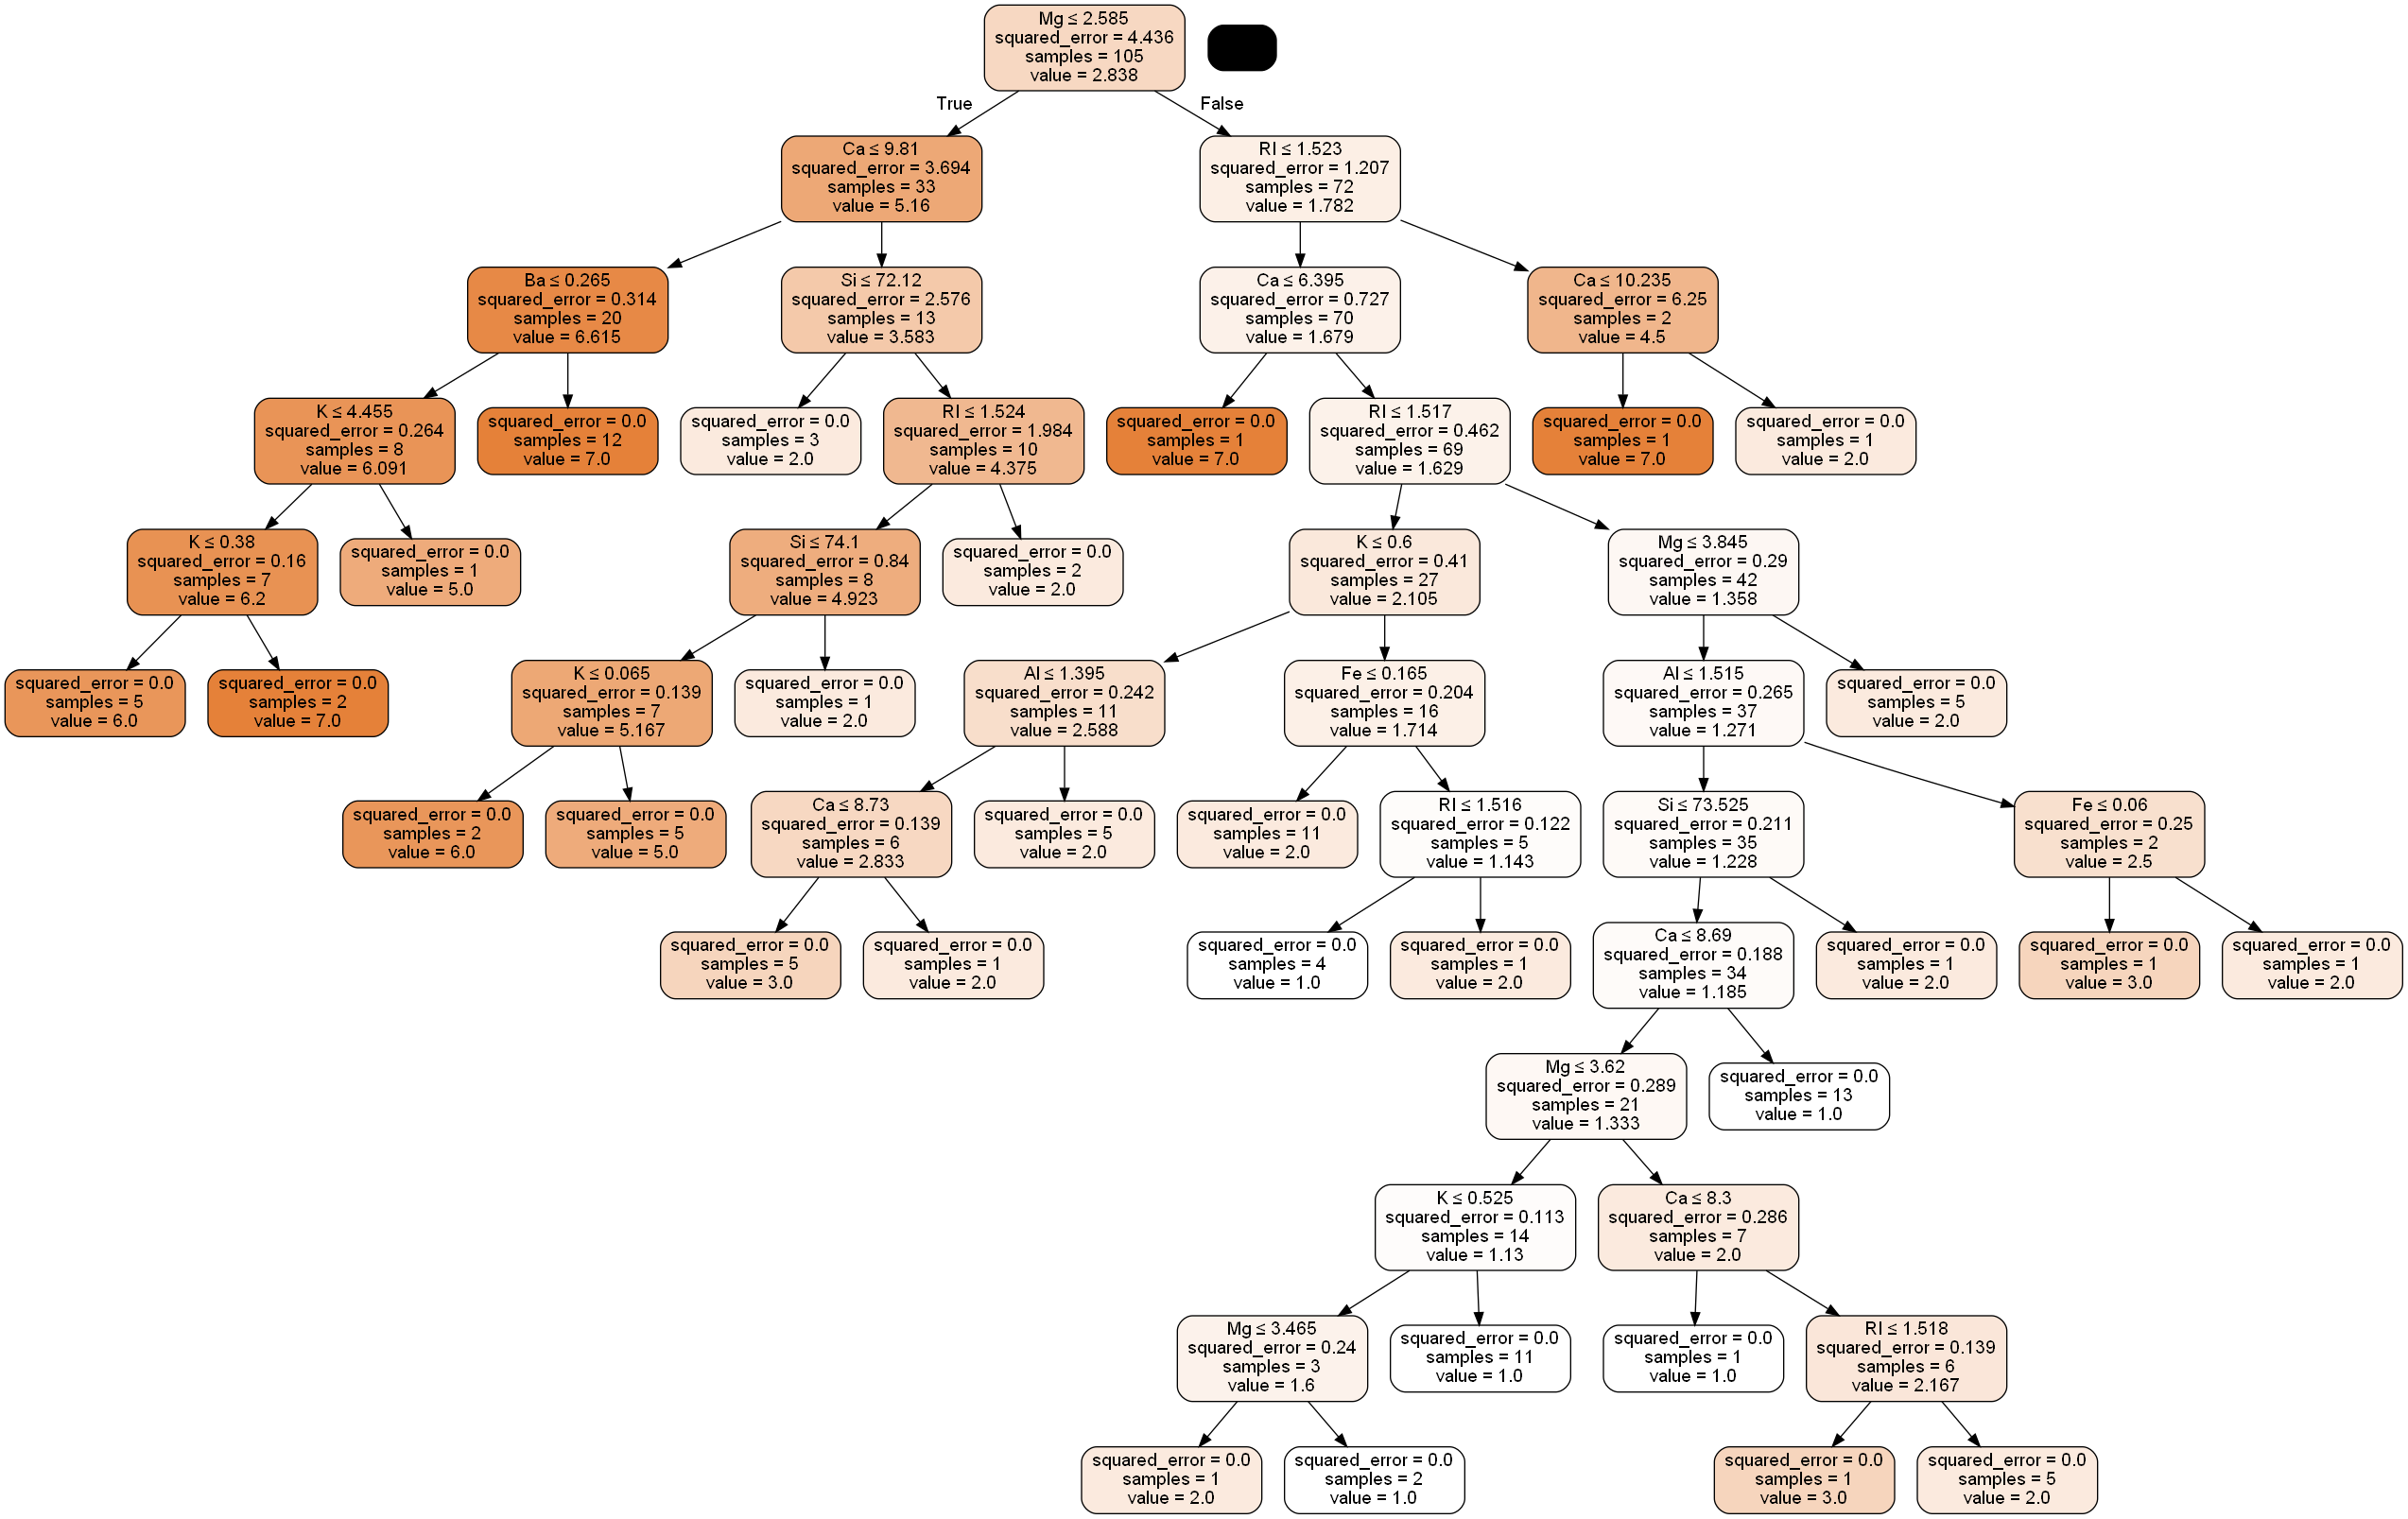

In [23]:
Image(get_png_tree(bagging_model.estimators_[2], X.columns))

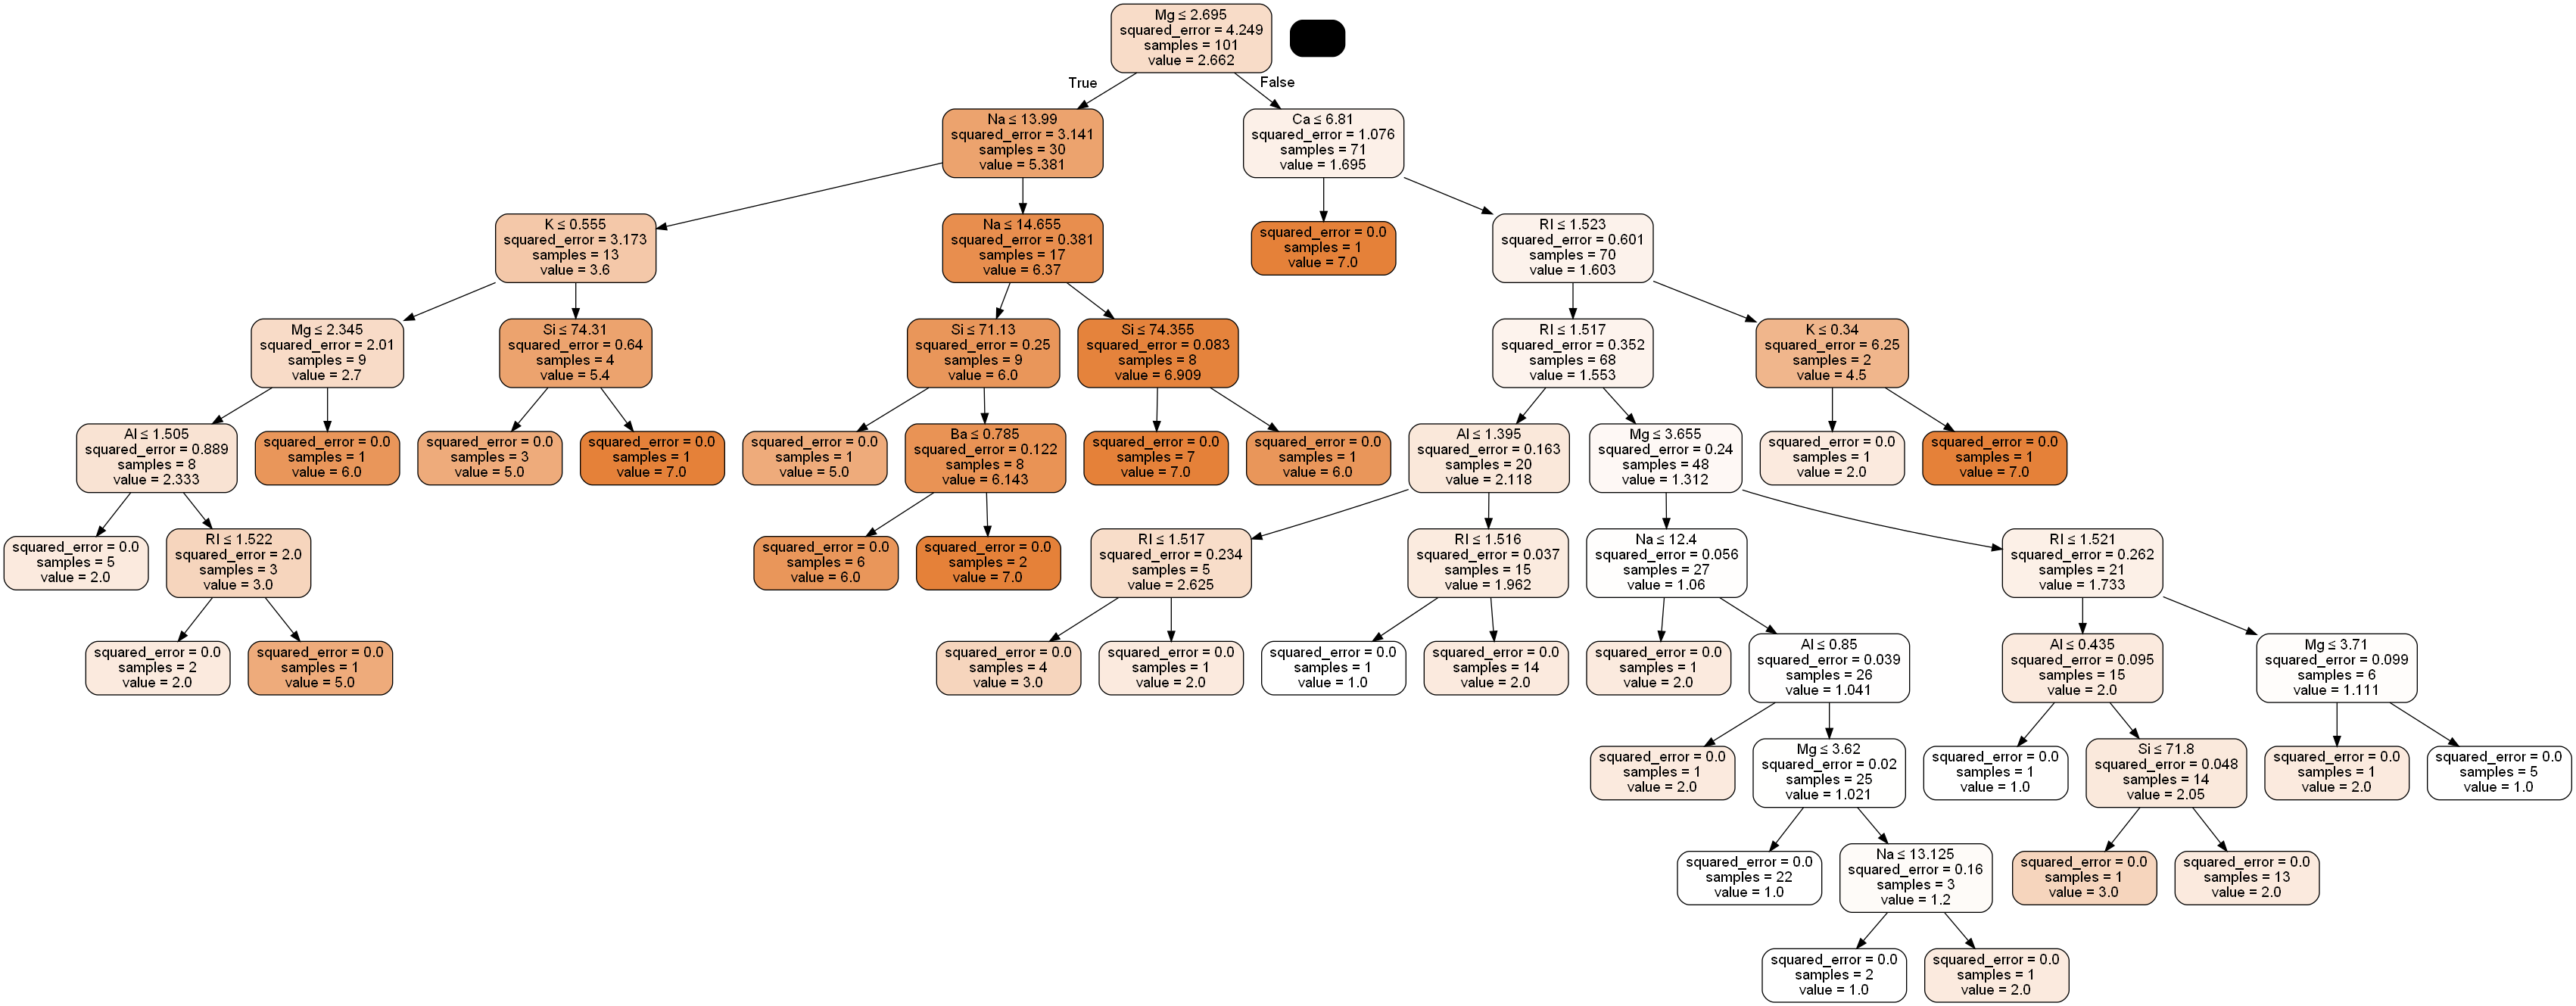

In [24]:
Image(get_png_tree(bagging_model.estimators_[3], X.columns))

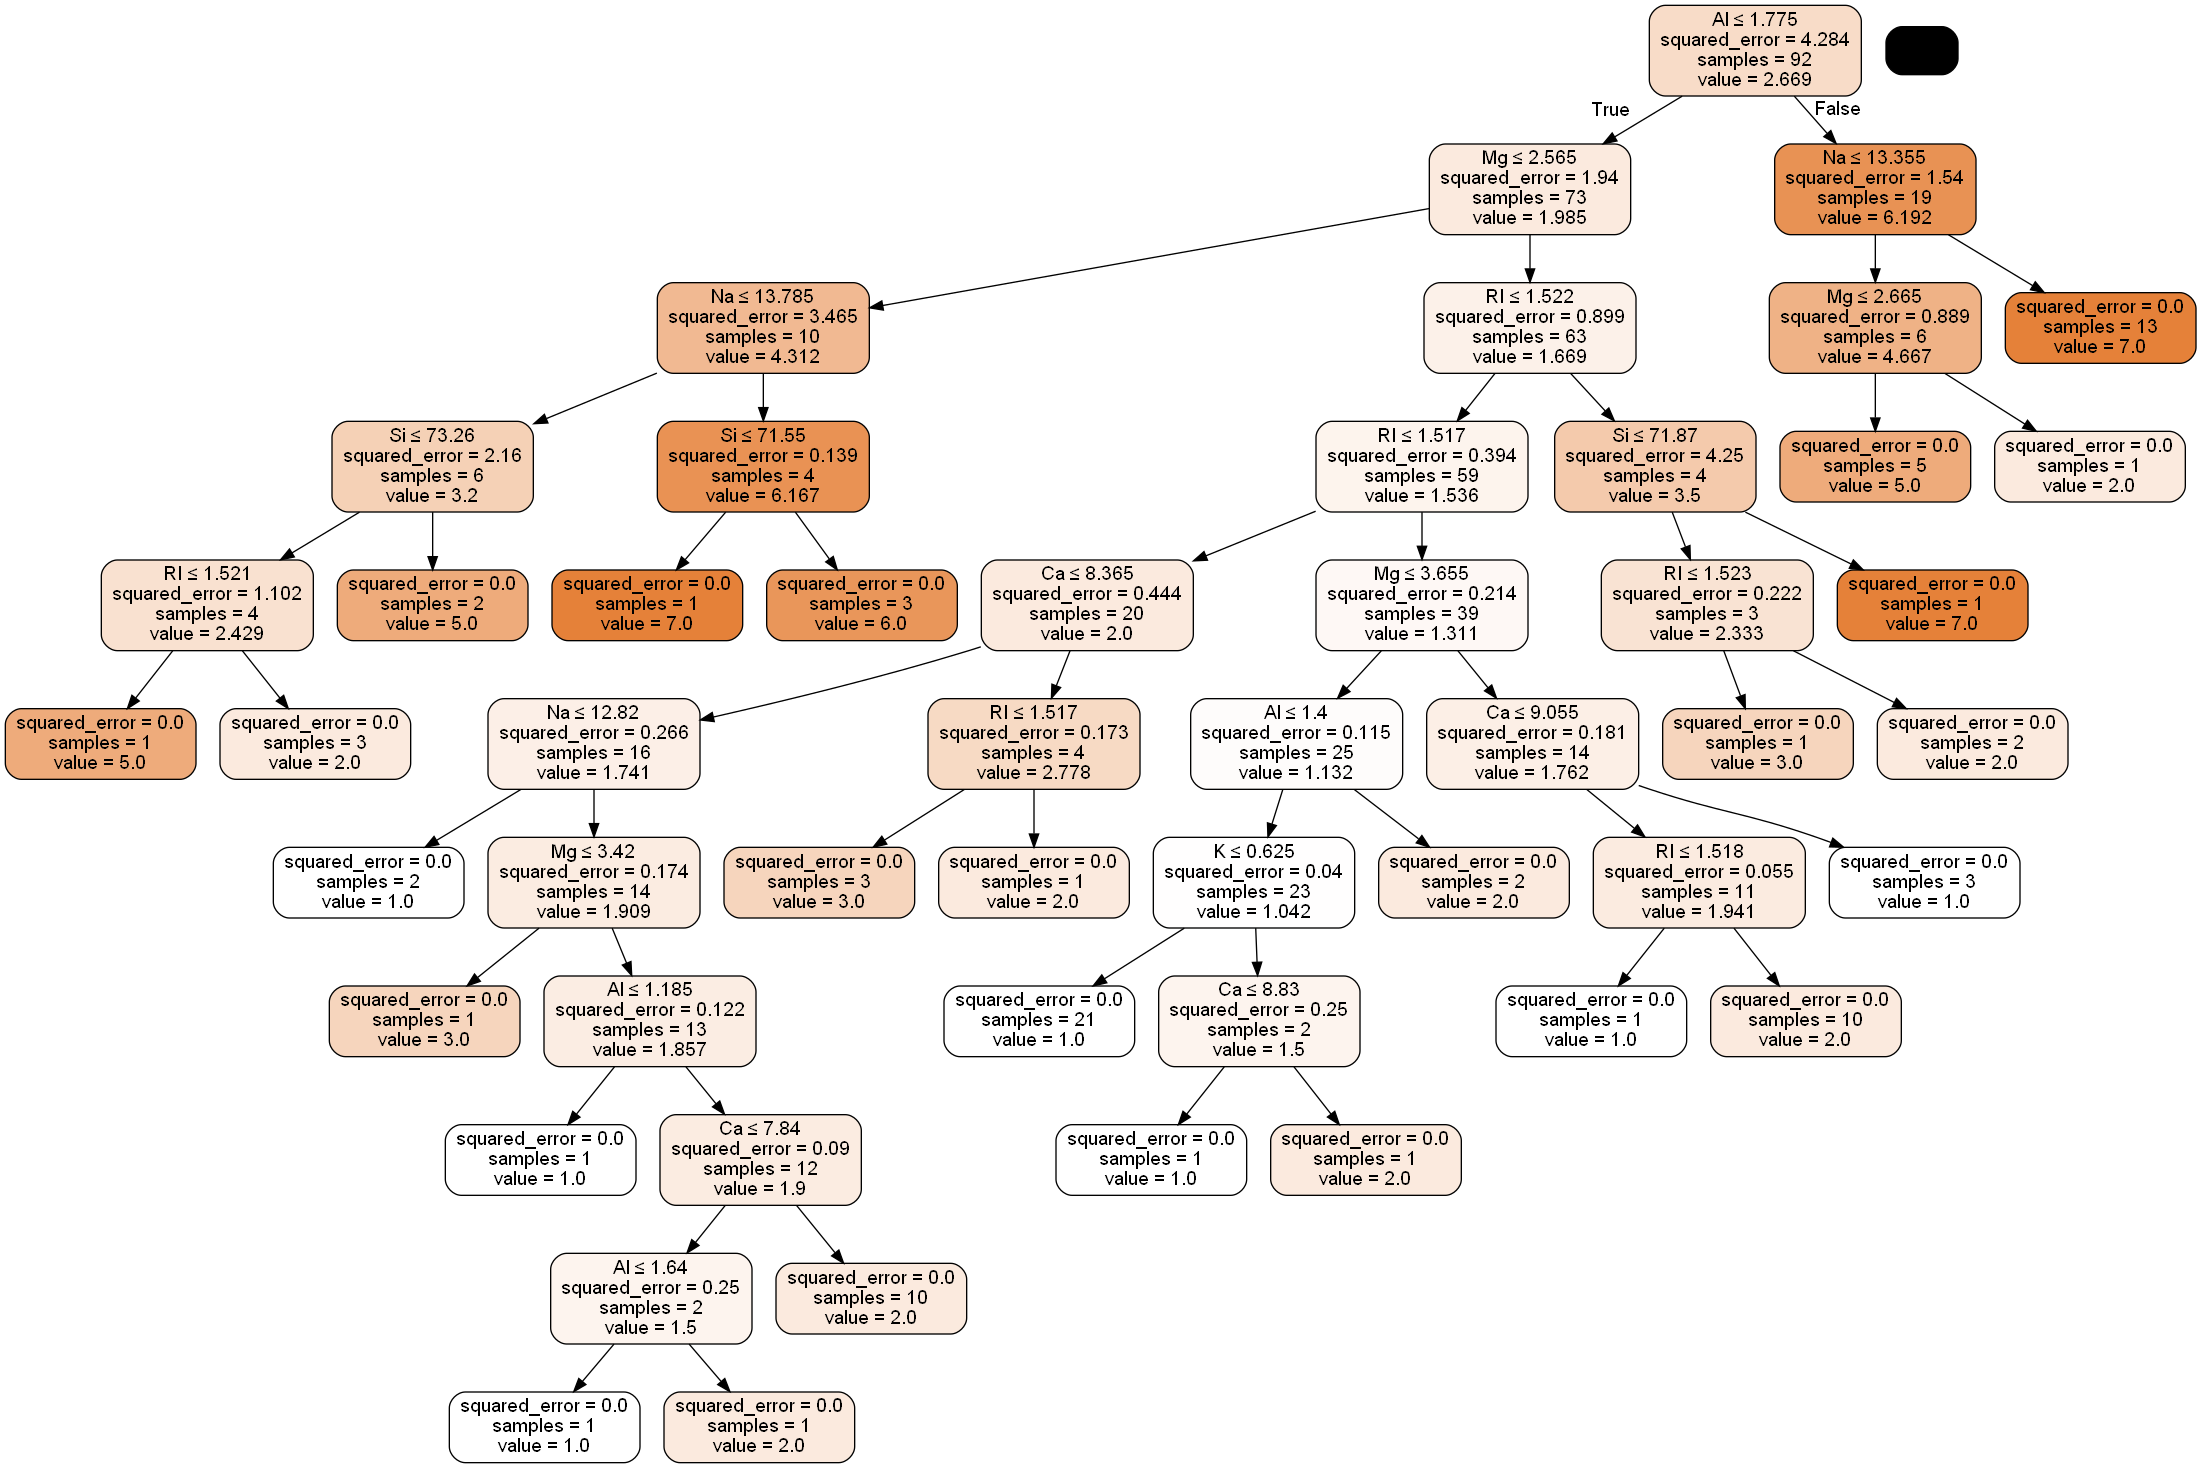

In [25]:
Image(get_png_tree(bagging_model.estimators_[4], X.columns))

Заметно, что деревья различны.

Визуализируем результаты регрессии:

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X2, y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = X2[:, 0], X2[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Na')
    ax.set_ylabel('Si')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

Оставим только два признака - Na и Si:

In [28]:
X2 = X[['Na', 'Si']].to_numpy()

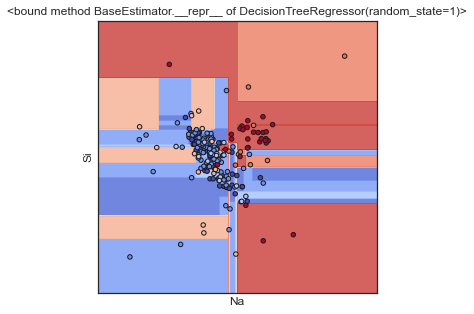

In [29]:
plot_cl(DecisionTreeRegressor(random_state=1))

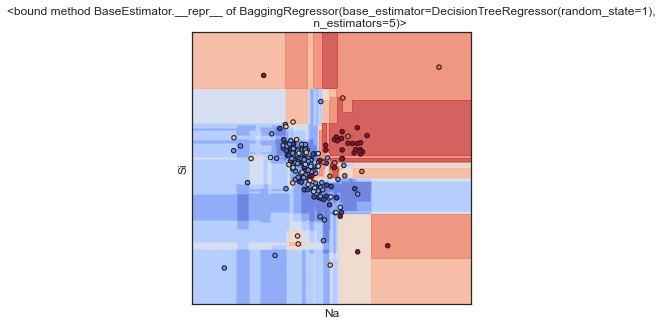

In [30]:
plot_cl(BaggingRegressor(DecisionTreeRegressor(random_state=1), n_estimators=5))

### Модель градиентного бустинга

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

Обучим модель на 5 деревьях:

In [32]:
gradient_model = GradientBoostingRegressor(n_estimators=5)
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=5)

Для визуализации регрессии будем использовать функцию plot_cl из визуализации регрессии модели бэггинга:

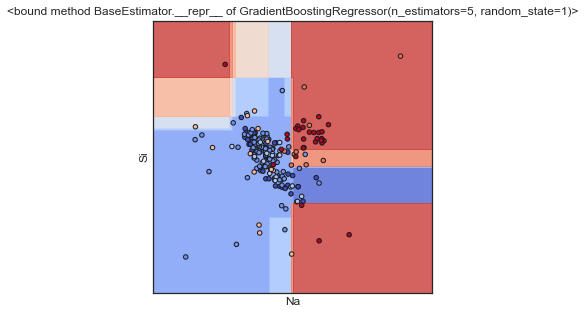

In [33]:
plot_cl(GradientBoostingRegressor(random_state=1, n_estimators=5))

### Модель стекинга

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Реализуем модель стекинга через библиотеку heamy:

In [35]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

In [36]:
dataset = Dataset(X_train, y_train, X_test)

Построим модели дерева, линейную модель и случайного леса для задачи регрессии:

In [37]:
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True}, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 5}, name='rf')

Определим их качество:

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print("MAE = {}".format(result))

In [40]:
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=5)
]:
    val_mae(model)
    print()

LinearRegression()
MAE = 0.7674795585625986

DecisionTreeRegressor()
MAE = 0.5740740740740741

RandomForestRegressor(n_estimators=5)
MAE = 0.7000000000000003



Сделаем несколько экспериментов для определения лучшего расположения моделей.

1: на первом уровне - дерево и линейная регрессия, а на втором - линейная регрессия:

In [41]:
pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)

stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.9343038538699631, 0.6741240299143151, 1.148855880577542, 0.804952423447935, 0.7433758171159082, 0.5933363445393178, 0.841554871284919, 0.9027277159278726, 0.9792465696505968, 0.7520786269630576]
Mean accuracy: 0.8374556133291428
Standard Deviation: 0.1530358629440931
Variance: 0.02341997534704325


2: на первом уровне - дерево и стохастический градиентный спуск, а на втором - случайный лес:

In [42]:
stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.7756250000000001, 0.529375, 1.2375, 0.9025000000000001, 0.80625, 0.850625, 0.8162499999999999, 0.9293750000000001, 0.77125, 0.64375]
Mean accuracy: 0.8262500000000002
Standard Deviation: 0.17711534024471173
Variance: 0.03136984375


3: на первом уровне - дерево, линейная регрессия и случайный лес, а на втором - линейная регрессия:

In [43]:
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)

stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.822566076331519, 0.5952680586138698, 1.1577994260154325, 0.7950018519448512, 0.648576912753356, 0.5167249218149097, 0.7253297444314115, 0.8648446064521539, 0.8336842495096648, 0.6534908584095975]
Mean accuracy: 0.7613286706276765
Standard Deviation: 0.17060739660716165
Variance: 0.02910688377707335


4: на первом уровне - дерево, линейная регрессия и случайный лес, а на втором - случайный лес:

In [44]:
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.865, 0.5437500000000001, 1.053125, 0.825625, 0.9287500000000001, 0.505625, 0.69875, 0.880625, 0.7306249999999999, 0.546875]
Mean accuracy: 0.757875
Standard Deviation: 0.17485511859822692
Variance: 0.0305743125


Выведем результаты:

In [45]:
array_labels = ['LR','TREE', 'RF', 'TREE+LR=>LR', 
                'TREE+LR=>RF', 'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF']
array_mae = [0.7674795585625986, 0.5740740740740741, 0.7000000000000003, 
             0.8374556133291428, 0.8262500000000002, 0.7613286706276765, 
             0.757875]

In [46]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

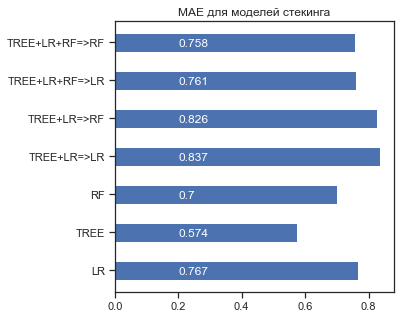

In [47]:
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')

Чем ближе значение MAE к нулю, тем лучше качество регрессии.

Лучший результат у исходных моделей - у модели дерева, а у моделей стекинга - у эксперимента 4, где на первом уровне располагаются дерево, линейная регрессия и случайный лес, а на втором - случайный лес.

Эту модель и будем использовать для дальнейшей оценки качества:

In [48]:
stacking_model = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)

## Обучение дополнительных моделей

### Модель многослойного персептрона

Обучим модель многослойного персептрона:

In [49]:
from sklearn.neural_network import MLPRegressor

In [50]:
perceptron_model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                 hidden_layer_sizes=(5, 2), random_state=1)
perceptron_model.fit(X_train, y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
             solver='lbfgs')

### Модель МГУА

Также обучим модель МГУА с помощью библиотеки GmdhPy:

In [51]:
from gmdhpy.gmdh import Regressor

In [52]:
multilayered_model = Regressor()
multilayered_model.fit(X_train.values, y_train.values)

train layer0 in 0.03 sec
train layer1 in 0.11 sec
train layer2 in 0.10 sec
train layer3 in 0.17 sec
train layer4 in 0.13 sec
train layer5 in 0.12 sec
train layer6 in 0.12 sec
train layer7 in 0.11 sec
train layer8 in 0.09 sec
train layer9 in 0.11 sec
train layer10 in 0.10 sec
train layer11 in 0.10 sec
train layer12 in 0.11 sec
train layer13 in 0.10 sec
train layer14 in 0.10 sec
train layer15 in 0.10 sec


## Оценка качества полученных моделей

Для оценки качества полученных моделей будем использовать метрику "Средняя абсолютная ошибка" (mean_absolute_error).

Чем ближе её значение к нулю, тем лучше качество регрессии.

Посчитаем метрику для всех моделей:

In [53]:
mean_absolute_error(y_test, bagging_model.predict(X_test))

0.6074074074074075

In [54]:
mean_absolute_error(y_test, gradient_model.predict(X_test))

1.251807776235007

In [55]:
results = stacking_model.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.865, 0.5437500000000001, 1.053125, 0.825625, 0.9287500000000001, 0.505625, 0.69875, 0.880625, 0.7306249999999999, 0.546875]
Mean accuracy: 0.757875
Standard Deviation: 0.17485511859822692
Variance: 0.0305743125


In [56]:
mean_absolute_error(y_test, perceptron_model.predict(X_test))

1.6462962962963001

In [57]:
mean_absolute_error(y_test, multilayered_model.predict(X_test.values))

0.7043107407355916

In [58]:
labels = ['Бэггинг','Бустинг', 'Стекинг', 'Многослойный персептрон', 
                'МГУА']
mae = [0.6074074074074075, 1.251807776235007, 0.757875, 
             1.6462962962963001, 0.7043107407355916]

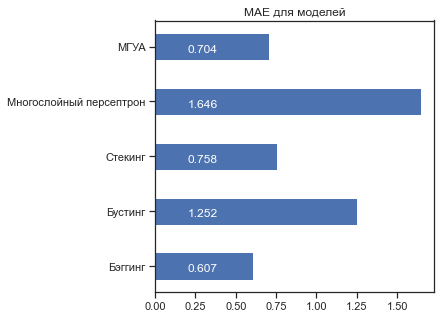

In [59]:
vis_models_quality(mae, labels, 'MAE для моделей')

Самое лучшее качество регресии наблюдается у модели бэггинга (минимальное число - 0.607), а самое худшее качество - у модели многослойного персептрона (1.646).

Результаты качества регресии у моделей МГУА и стекинга сравнимы (0.704 и 0.758).